<a href="https://colab.research.google.com/github/yangyu-jin/Data-Analysis-with-Open-Source/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_4%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# 오픈소스 기반 데이터 분석 4강 - 데이터 수집


## 4-1 CSV 파일 읽기

In [ ]:
import pandas as pd

## data.csv 파일 읽기

print(df)

In [ ]:
import pandas as pd

## data.csv 파일 읽기
df = pd.read_csv('data.csv', encoding='utf-8', sep=',', header=0, index_col=None, skiprows=None, nrows=None)
print(df)

           날짜    체중  골격근량  체지방량
0  2025.02.06  64.7  30.0  11.1
1  2025.02.04  64.0  29.3  11.6


## 4-2 JSON 파일 읽기



In [ ]:
import json
import pandas as pd

## data.json 파일 출력

## data.json 파일 DataFrame 읽기

print(df)

In [ ]:
import json
import pandas as pd

## data.json 파일 출력
with open('data.json', mode='r', encoding='utf-8') as f:
    data = json.load(f)

## data.json 파일 DataFrame 읽기
df = pd.read_json('data.json', orient='records', encoding='utf-8', lines = False)
print(df)

                                               매출데이터
0  {'월': '2025-01', '매출액': 1000000, '비용': 700000,...
1  {'월': '2025-02', '매출액': 1200000, '비용': 800000,...
2  {'월': '2025-03', '매출액': 1500000, '비용': 900000,...


## 4-3 텍스트 파일 읽기 및 데이터 추출

In [ ]:
import re

## 파일(callcenter20250301.log) 오픈 및 읽기
with open('callcenter20250301.log', 'r', encoding='utf-8') as f:
    content = f.read()
## 주민등록번호 패턴 생성

## 주민등록번호 마스킹


## 마스킹된 파일(callcenter20250301_masked.log) 오픈 및 쓰기


print("주민등록번호 마스킹 완료. 'callcenter20250301_masked.log.txt' 파일로 저장되었습니다.")

In [ ]:
import re

## 파일(callcenter20250301.log) 오픈 및 읽기
with open('callcenter20250301.log', 'r', encoding='utf-8') as f:
    content = f.read()
## 주민등록번호 패턴 생성
pattern = re.compile(r'(\d{6})-(\d{7})')
## 주민등록번호 마스킹
masked_content = pattern.sub(r'\1-*******', content)

## 마스킹된 파일(callcenter20250301_masked.log) 오픈 및 쓰기
with open('callcenter20250301_masked.log', mode='w') as f:
    f.write(masked_content)

print("주민등록번호 마스킹 완료. 'callcenter20250301_masked.log.txt' 파일로 저장되었습니다.")

주민등록번호 마스킹 완료. 'callcenter20250301_masked.log.txt' 파일로 저장되었습니다.


## 4-4 Open-Meteo의 무료 날씨 API를 통한 특정 지역 온도 조회

In [ ]:
import requests
import json

url = "https://api.open-meteo.com/v1/forecast?=&=&current=temperature_2m"
params = {
    "latitude": "37.58638333",
    "longitude": "127.0203333",
    "current": "temperature_2m"
}

try:
    ## URL 및 파라미터 전송

    ## JSON 데이터 읽기

    print("API 응답:", data)
    print("서울시 종로구의 현재 온도는 : {0}{1} 입니다.".format(data['current']['temperature_2m'], data['current_units']['temperature_2m']))

except requests.exceptions.RequestException as e:
    print(f"API 호출 실패: {e}")
except json.JSONDecodeError as e:
    print(f"JSON 파싱 실패: {e}")

In [ ]:
import requests
import json

url = "https://api.open-meteo.com/v1/forecast?=&=&current=temperature_2m"
params = {
    "latitude": "37.58638333",
    "longitude": "127.0203333",
    "current": "temperature_2m"
}

try:
    ## URL 및 파라미터 전송
    response = requests.get(url, params=params)
    response.raise_for_status()

    ## JSON 데이터 읽기
    data = response.json()

    print("API 응답:", data)
    print("서울시 종로구의 현재 온도는 : {0}{1} 입니다.".format(data['current']['temperature_2m'], data['current_units']['temperature_2m']))

except requests.exceptions.RequestException as e:
    print(f"API 호출 실패: {e}")
except json.JSONDecodeError as e:
    print(f"JSON 파싱 실패: {e}")

API 응답: {'latitude': 37.6, 'longitude': 127.0, 'generationtime_ms': 0.053048133850097656, 'utc_offset_seconds': 0, 'timezone': 'GMT', 'timezone_abbreviation': 'GMT', 'elevation': 29.0, 'current_units': {'time': 'iso8601', 'interval': 'seconds', 'temperature_2m': '°C'}, 'current': {'time': '2025-10-07T23:30', 'interval': 900, 'temperature_2m': 18.4}}
서울시 종로구의 현재 온도는 : 18.4°C 입니다.


## 4-5 Selenium과 lxml을 이용한 웹 스크래핑

In [ ]:
!curl -o google-chrome-stable_current_amd64.deb https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!apt install ./google-chrome-stable_current_amd64.deb -y
!pip install selenium webdriver_manager

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  114M  100  114M    0     0  16.9M      0  0:00:06  0:00:06 --:--:-- 23.2M
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'google-chrome-stable' instead of './google-chrome-stable_current_amd64.deb'
The following additional packages will be installed:
  libvulkan1 mesa-vulkan-drivers
The following NEW packages will be installed:
  google-chrome-stable libvulkan1 mesa-vulkan-drivers
0 upgraded, 3 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.9 MB/131 MB of archives.
After this operation, 448 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libvulkan1 amd64 1.3.204.1-2 [128 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 mesa-vulkan-drivers amd64 23.2.1-1ubuntu3.1~22.04.3 [10.7

In [ ]:
!curl -o google-chrome-stable_current_amd64.deb https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!apt install ./google-chrome-stable_current_amd64.deb -y
!pip install selenium webdriver_manager

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from lxml import html
import time

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')               # 브라우저 창 없이 실행
chrome_options.add_argument('--no-sandbox')             # 보안모드 비활성화 (Colab 필수)
chrome_options.add_argument('--disable-dev-shm-usage')  # 메모리 부족 방지 (Colab 필수)
chrome_options.add_argument('--window-size=1920x1080')  # 창 크기 설정(가상)
chrome_options.add_argument('--disable-gpu')            # GPU 가속 비활성화 (일부 환경 안정성)
chrome_options.binary_location = "/usr/bin/google-chrome-stable"  # Colab용 크롬 경로 지정

## 드라이버 실행
driver = webdriver.Chrome(options=chrome_options)

## 사이트 접속


## 사이트 접속 대기


## 페이지 제목 출력


## 드라이버 종료
driver.quit()

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from lxml import html
import time

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')               # 브라우저 창 없이 실행
chrome_options.add_argument('--no-sandbox')             # 보안모드 비활성화 (Colab 필수)
chrome_options.add_argument('--disable-dev-shm-usage')  # 메모리 부족 방지 (Colab 필수)
chrome_options.add_argument('--window-size=1920x1080')  # 창 크기 설정(가상)
chrome_options.add_argument('--disable-gpu')            # GPU 가속 비활성화 (일부 환경 안정성)
chrome_options.binary_location = "/usr/bin/google-chrome-stable"  # Colab용 크롬 경로 지정

## 드라이버 실행
driver = webdriver.Chrome(options=chrome_options)

## 사이트 접속
url = 'https://professor.knou.ac.kr/jaehwachung/index.do'
driver.get(url)

## 사이트 접속 대기
time.sleep(2)

## 페이지 제목 출력
page_source = driver.page_source
tree = html.fromstring(page_source)

title_text = tree.xpath('//title/text()')
print(title_text)
## 드라이버 종료

driver.quit()

['\n\t\tAlert \n\t\t\n\t']



# 실습 시나리오

## 공공데이터 포털 가입 및 데이터 신청

- [https://www.data.go.kr](https://www.data.go.kr)
- 한국환경공단 에어코리아 대기오염정보 데이터 신청

In [ ]:
import requests

## 데이터 수집 url 및 api key 설정


params = {
    'serviceKey': api_key,
    'returnType': 'json',
    'numOfRows': '100',
    'pageNo': '1',
    'sidoName': '서울',
    'ver': '1.0'
}

## 데이터 수집

## 호출 성공/실패 출력



In [ ]:
import requests

## 데이터 수집 url 및 api key 설정
url = 'http://apis.data.go.kr/B552584/ArpltnInforInqireSvc/getCtprvnRltmMesureDnsty'
api_key = 'a3ERY4puvBYW5LhAQgRqnqYHo/4RShGV0rACSs'
params = {
    'serviceKey': api_key,
    'returnType': 'json',
    'numOfRows': '100',
    'pageNo': '1',
    'sidoName': '서울',
    'ver': '1.0'
}

## 데이터 수집
response = requests.get(url, params = params)
## 호출 성공/실패 출력
print(response.json())


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
import requests

## 데이터 수집 url 및 api key 설정
url =  'http://openapi.seoul.go.kr:8088/4c756f714673756236346f754f5347/json/energyUseDataSummaryInfo/1/5/2015/01'
api_key = '4c756f714673756236346f754f5347'
params = {
    'KEY': api_key,
    'TYPE': 'json',
    'SERVICE': 'energyUseDataSummaryInfo',
    'START_INDEX': '1',
    'END_INDEX': '',
    'YEAR': '2015',
    'MON': '01',
}

## 데이터 수집
response = requests.get(url, params=params)

## 호출 성공/실패 출력
print(response.json())


{'energyUseDataSummaryInfo': {'list_total_count': 7, 'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'}, 'row': [{'YEAR': '2015', 'MON': '01', 'MM_TYPE': '개인', 'CNT': '767791', 'EUS': '193784708', 'EUS1': '194781915', 'EUS2': '204969429', 'ECO2_1': '-6090964', 'ECO2_2': '-2582568.736', 'GUS': '59133720', 'GUS1': '57163993', 'GUS2': '68297619', 'GCO2_1': '-3597086', 'GCO2_2': '-8057472.64', 'WUS': '12819757.886', 'WUS1': '12723680.426', 'WUS2': '12899476.73', 'WCO2_1': '8179.308', 'WCO2_2': '2715.530256', 'HUS': '22740838.937', 'HUS1': '23400055.303', 'HUS2': '27090493.875', 'HCO2_1': '-2504435.652', 'HCO2_2': '-33660084.213069', 'REG_DATE': '2015-06-04 17:03:55.0'}, {'YEAR': '2015', 'MON': '01', 'MM_TYPE': '학교', 'CNT': '1382', 'EUS': '134955565', 'EUS1': '128707423', 'EUS2': '145561511', 'ECO2_1': '-2178902', 'ECO2_2': '-923854.448', 'GUS': '9107197', 'GUS1': '8410968', 'GUS2': '10745416', 'GCO2_1': '-470995', 'GCO2_2': '-1055028.8', 'WUS': '2075819.2', 'WUS1': '2097433.8', 'WUS2'

In [ ]:
import requests
import time

# API 키 및 URL 템플릿
api_key = '4c756f714673756236346f754f5347'
url_template = f'http://openapi.seoul.go.kr:8088/{api_key}/json/energyUseDataSummaryInfo/1/5/{{year}}/{{month}}'


params = {
    'KEY': api_key,
    'TYPE': 'json',
    'SERVICE': 'energyUseDataSummaryInfo',
    'START_INDEX': '1',
    'END_INDEX': '5',
    'YEAR': 'year',
    'MON': 'month',
}

# 연도-월 리스트 생성 함수
def get_year_months():
    year_months = []
    for year in range(2015, 2024 + 1):
        for month in range(1, 12 + 1):
            year_months.append((year, f"{month:02d}"))
    return year_months

# 응답 저장 리스트
responses = []

# 데이터 수집 루프
for year, month in get_year_months():
    url = url_template.format(year=year, month=month)
    try:
        response = requests.get(url)
        if response.status_code == 200:
             data = response.json()
             responses.append(data)  # 응답 저장

              ## 호출 성공/실패 출력
             print(response.json())

        else:
            print(f"{year}-{month}: 호출 실패 (status code: {response.status_code})")

    except Exception as e:
        print(f"{year}-{month}: 오류 - {e}")

    time.sleep(0.2)  # 서버 과부하 방지

## 데이터 수집
response = requests.get(url, params=params)

# 전체 자료 수 출력
print(f"\n총 호출된 자료 수: {len(responses)}")

# 데이터 추출
items = data.get('energyUseDataSummaryInfo',{}).get('row', [])
for item in items:
    if item.get('MM_TYPE') == '개인':
        filtered_item = {
            '연도': item.get('YEAR'),
            '월': item.get('MON'),
            '유형': item.get('MM_TYPE'),
            '현년전기사용량': item.get('EUS'),
            '현년가스사용량': item.get('GUS'),
            '현년수도사용량': item.get('WUS'),
            '현년지역난방사용량': item.get('HUS')
        }
        responses.append(filtered_item)


{'energyUseDataSummaryInfo': {'list_total_count': 7, 'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'}, 'row': [{'YEAR': '2015', 'MON': '01', 'MM_TYPE': '개인', 'CNT': '767791', 'EUS': '193784708', 'EUS1': '194781915', 'EUS2': '204969429', 'ECO2_1': '-6090964', 'ECO2_2': '-2582568.736', 'GUS': '59133720', 'GUS1': '57163993', 'GUS2': '68297619', 'GCO2_1': '-3597086', 'GCO2_2': '-8057472.64', 'WUS': '12819757.886', 'WUS1': '12723680.426', 'WUS2': '12899476.73', 'WCO2_1': '8179.308', 'WCO2_2': '2715.530256', 'HUS': '22740838.937', 'HUS1': '23400055.303', 'HUS2': '27090493.875', 'HCO2_1': '-2504435.652', 'HCO2_2': '-33660084.213069', 'REG_DATE': '2015-06-04 17:03:55.0'}, {'YEAR': '2015', 'MON': '01', 'MM_TYPE': '학교', 'CNT': '1382', 'EUS': '134955565', 'EUS1': '128707423', 'EUS2': '145561511', 'ECO2_1': '-2178902', 'ECO2_2': '-923854.448', 'GUS': '9107197', 'GUS1': '8410968', 'GUS2': '10745416', 'GCO2_1': '-470995', 'GCO2_2': '-1055028.8', 'WUS': '2075819.2', 'WUS1': '2097433.8', 'WUS2'

In [ ]:
import requests
import time

# API 키 및 URL 템플릿
api_key = '4c756f714673756236346f754f5347'
url_template = f'http://openapi.seoul.go.kr:8088/{api_key}/json/energyUseDataSummaryInfo/1/10/{{year}}/{{month}}'

params = {
    'KEY': api_key,
    'TYPE': 'json',
    'SERVICE': 'energyUseDataSummaryInfo',
    'START_INDEX': '1',
    'END_INDEX': '5',
    'YEAR': 'year',
    'MON': 'month',
}

# 연도-월 리스트 생성 함수
def get_year_months():
    year_months = []
    for year in range(2015, 2024 + 1):
        for month in range(1, 12 + 1):
            year_months.append((year, f"{month:02d}"))
    return year_months

# 응답 저장 리스트
responses = []

# 데이터 수집 루프
for year, month in get_year_months():
    url = url_template.format(year=year, month=month)
    try:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            items = data.get('energyUseDataSummaryInfo',{}).get('row', [])

            # 데이터 필터링
            for item in items:
                if item.get('MM_TYPE') == '개인':
                    filtered_item = {
                        '연도': item.get('YEAR'),
                        '월': item.get('MON'),
                        '유형': item.get('MM_TYPE'),
                        '현년전기사용량': item.get('EUS'),
                        '현년가스사용량': item.get('GUS'),
                        '현년수도사용량': item.get('WUS'),
                        '현년지역난방사용량': item.get('HUS')
                    }
                    responses.append(filtered_item)

                    #필터링된 데이터 출력
                    print(filtered_item)

        else:
            print(f"{year}-{month}: 호출 실패 (status code: {response.status_code})")

    except Exception as e:
        print(f"{year}-{month}: 오류 - {e}")

    time.sleep(0.2)  # 서버 과부하 방지

# 전체 자료 수 출력
print(f"\n총 호출된 자료 수: {len(responses)}")





{'연도': '2015', '월': '01', '유형': '개인', '현년전기사용량': '193784708', '현년가스사용량': '59133720', '현년수도사용량': '12819757.886', '현년지역난방사용량': '22740838.937'}
{'연도': '2015', '월': '02', '유형': '개인', '현년전기사용량': '189974230', '현년가스사용량': '56487358', '현년수도사용량': '12656888.218', '현년지역난방사용량': '18793320.213'}
{'연도': '2015', '월': '03', '유형': '개인', '현년전기사용량': '175215719', '현년가스사용량': '49984873', '현년수도사용량': '12655474.249', '현년지역난방사용량': '13826348.508'}
{'연도': '2015', '월': '04', '유형': '개인', '현년전기사용량': '183891769', '현년가스사용량': '37306841', '현년수도사용량': '12954773.246', '현년지역난방사용량': '5836002.885'}
{'연도': '2015', '월': '05', '유형': '개인', '현년전기사용량': '177289769', '현년가스사용량': '22060892', '현년수도사용량': '13086734.214', '현년지역난방사용량': '1320895.801'}
{'연도': '2015', '월': '06', '유형': '개인', '현년전기사용량': '186073153', '현년가스사용량': '12677645', '현년수도사용량': '14241651.402', '현년지역난방사용량': '294312.634'}
{'연도': '2015', '월': '07', '유형': '개인', '현년전기사용량': '165114568', '현년가스사용량': '8893640', '현년수도사용량': '12083879.038', '현년지역난방사용량': '702863.645'}
{'연도': '2015', '월': 

In [ ]:
import requests
import time

# API 키 및 URL 템플릿
api_key = '4c756f714673756236346f754f5347'
url_template = f'http://openapi.seoul.go.kr:8088/{api_key}/json/energyUseDataSummaryInfo/1/10/{{year}}/{{month}}'

params = {
    'KEY': api_key,
    'TYPE': 'json',
    'SERVICE': 'energyUseDataSummaryInfo',
    'START_INDEX': '1',
    'END_INDEX': '5',
    'YEAR': 'year',
    'MON': 'month',
}

# 연도-월 리스트 생성 함수
def get_year_months():
    year_months = []
    for year in range(2015, 2024 + 1):
        for month in range(1, 12 + 1):
            year_months.append((year, f"{month:02d}"))
    return year_months

# 응답 저장 리스트
responses = []

# 데이터 수집 루프
for year, month in get_year_months():
    url = url_template.format(year=year, month=month)
    try:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            items = data.get('energyUseDataSummaryInfo',{}).get('row', [])

            # 데이터 필터링
            for item in items:
                if item.get('MM_TYPE') == '개인':
                    filtered_item = {
                        '연도': item.get('YEAR'),
                        '월': item.get('MON'),
                        '유형': item.get('MM_TYPE'),
                        '현년전기사용량': item.get('EUS'),
                        '현년가스사용량': item.get('GUS'),
                        '현년수도사용량': item.get('WUS'),
                        '현년지역난방사용량': item.get('HUS')
                    }
                    responses.append(filtered_item)

        else:
            print(f"{year}-{month}: 호출 실패 (status code: {response.status_code})")

    except Exception as e:
        print(f"{year}-{month}: 오류 - {e}")

    time.sleep(0.2)  # 서버 과부하 방지

# 전체 자료 수 출력
print(f"\n총 호출된 자료 수: {len(responses)}")

import pandas as pd

# responses 리스트를 DataFrame으로 변환
df = pd.DataFrame(responses)

# 데이터 프레임 출력
print("\n 필터링된 데이터 (DataFrame 형태):")
print(df.to_string(index=False))

df.to_csv('energyUseDataSummaryInfo.csv', index = False, encoding = 'utf-8')
df.to_json('energyUseDataSummaryInfo.json', orient = 'records', force_ascii = False)
df.to_excel('energyUseDataSummaryInfo.xlsx', index = False)


총 호출된 자료 수: 120

 필터링된 데이터 (DataFrame 형태):
계절   연도  월 유형   현년전기사용량      현년가스사용량      현년수도사용량     현년지역난방사용량
겨울 2015 01 개인 193784708     59133720 12819757.886  22740838.937
겨울 2015 02 개인 189974230     56487358 12656888.218  18793320.213
 봄 2015 03 개인 175215719     49984873 12655474.249  13826348.508
 봄 2015 04 개인 183891769     37306841 12954773.246   5836002.885
 봄 2015 05 개인 177289769     22060892 13086734.214   1320895.801
여름 2015 06 개인 186073153     12677645 14241651.402    294312.634
여름 2015 07 개인 165114568      8893640 12083879.038    702863.645
여름 2015 08 개인 242000479      7619018 15164553.742    460288.965
가을 2015 09 개인 207540868      6518422 14419078.727    305710.728
가을 2015 10 개인 186473958      8924018 14711828.766   3167520.127
가을 2015 11 개인 196892030     20322557 13692668.676   11210982.51
겨울 2015 12 개인 203388142     40095231 13904162.958  21102616.717
겨울 2016 01 개인 215330620     57641741 13218916.436  27186166.133
겨울 2016 02 개인 216677664     68879796 13312113.622  21452994.

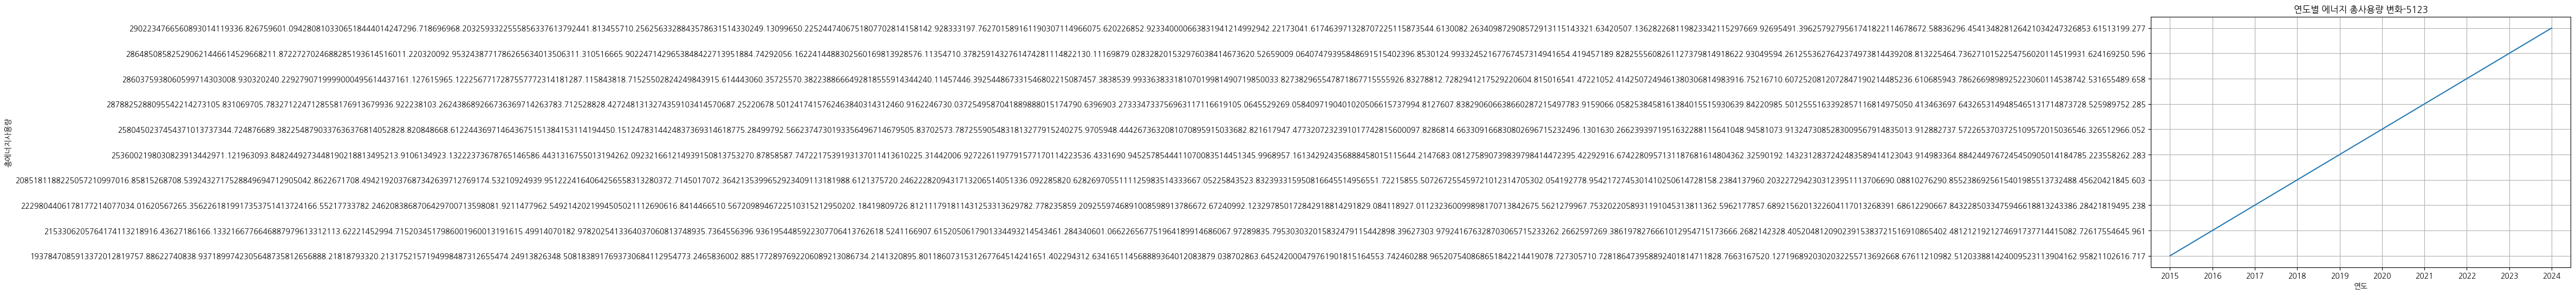

In [10]:
import requests
import time

# API 키 및 URL 템플릿
api_key = '4c756f714673756236346f754f5347'
url_template = f'http://openapi.seoul.go.kr:8088/{api_key}/json/energyUseDataSummaryInfo/1/10/{{year}}/{{month}}'

params = {
    'KEY': api_key,
    'TYPE': 'json',
    'SERVICE': 'energyUseDataSummaryInfo',
    'START_INDEX': '1',
    'END_INDEX': '5',
    'YEAR': 'year',
    'MON': 'month',
}

# 연도-월 리스트 생성 함수
def get_year_months():
    year_months = []
    for year in range(2015, 2024 + 1):
        for month in range(1, 12 + 1):
            year_months.append((year, f"{month:02d}"))
    return year_months

def season(month):
    month_int = int(month)
    if month_int in [3, 4, 5]:
        return '봄'
    elif month_int in [6,7,8]:
        return '여름'
    elif month_int in [9, 10, 11]:
        return '가을'
    else:
        return '겨울'

# 응답 저장 리스트
responses = []

# 데이터 수집 루프
for year, month in get_year_months():
    url = url_template.format(year=year, month=month)
    try:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            items = data.get('energyUseDataSummaryInfo',{}).get('row', [])

            # 데이터 필터링
            for item in items:
                if item.get('MM_TYPE') == '개인':
                    filtered_item = {
                        '계절': season(month),
                        '연도': item.get('YEAR'),
                        '월': item.get('MON'),
                        '유형': item.get('MM_TYPE'),
                        '현년전기사용량': item.get('EUS'),
                        '현년가스사용량': item.get('GUS'),
                        '현년수도사용량': item.get('WUS'),
                        '현년지역난방사용량': item.get('HUS')
                    }
                    responses.append(filtered_item)

        else:
            print(f"{year}-{month}: 호출 실패 (status code: {response.status_code})")

    except Exception as e:
        print(f"{year}-{month}: 오류 - {e}")

    time.sleep(0.2)  # 서버 과부하 방지

# 전체 자료 수 출력
print(f"\n총 호출된 자료 수: {len(responses)}")

import pandas as pd

# responses 리스트를 DataFrame으로 변환
df = pd.DataFrame(responses)

# 데이터 프레임 출력
print("\n 필터링된 데이터 (DataFrame 형태):")
print(df.to_string(index=False))

import matplotlib.pyplot as plt

#연도별 에너지 총사용량 컬럼 추가
df['총에너지사용량'] = df['현년전기사용량']  + df['현년가스사용량'] + df['현년수도사용량'] + df['현년지역난방사용량']

#연도별 에너지 총사용량 계산
yearly_sum = df.groupby('연도')['총에너지사용량'].sum().reset_index()

#선그래프 시각화
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10, 6))
plt.plot(yearly_sum['연도'], yearly_sum['총에너지사용량'])
plt.title('연도별 에너지 총사용량 변화-5123')
plt.xlabel('연도')
plt.ylabel('총에너지사용량')
plt.grid(True)
plt.show()

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache –fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [ ]:
import requests

import json



def collect_seoul_energy(api_key, year_start, year_end, output_file):

    result_list = []

    for year in range(year_start, year_end + 1):

        for month in range(1, 13):

            yyyy = f"{year}"

            mm = f"{month:02d}"

            url = f"http://openapi.seoul.go.kr:8088/{api_key}/JSON/energyUseDataSummaryInfo/1/25/{yyyy}/{mm}"

            try:

                response = requests.get(url, timeout=10)

                print(response.content.decode('utf-8'))

                response.raise_for_status()

                resp_json = response.json()

                for item in resp_json.get("energyUseDataSummaryInfo", {}).get("row", []):

                    # MM_TYPE이 '개인'인 항목만 처리

                    if item.get("MM_TYPE") == "개인":

                        # 저장할 에너지 타입만 골라서 딕셔너리 만듦

                        filtered_item = {

                            "연도": item.get("YEAR"),

                            "월": item.get("MON"),

                            "유형": item.get("MM_TYPE"),

                            "현년전기사용량": item.get("EUS"),

                            "현년가스사용량": item.get("GUS"),

                            "현년수도사용량": item.get("WUS"),

                            "현년지역난방사용량": item.get("HUS"),

                            }

                        result_list.append(filtered_item)

                print(f"{year}-{month:02d} 데이터 수집 완료")

            except Exception as ex:

                print(f"{year}-{month:02d} 에러: {ex}")



    with open(output_file, "w", encoding="utf-8") as f:

        json.dump(result_list, f, ensure_ascii=False, indent=2)

    print(f"모든 데이터 저장 완료: {output_file}")



def main():

    api_key = "4c756f714673756236346f754f5347"

    year_start = 2015

    year_end = 2024

    output_file = "seoul_energy_usage_2015_2024_personal.json"

    collect_seoul_energy(api_key, year_start, year_end, output_file)



if __name__ == "__main__":

    main()





{"energyUseDataSummaryInfo":{"list_total_count":7,"RESULT":{"CODE":"INFO-000","MESSAGE":"정상 처리되었습니다"},"row":[{"YEAR":"2015","MON":"01","MM_TYPE":"개인","CNT":"767791","EUS":"193784708","EUS1":"194781915","EUS2":"204969429","ECO2_1":"-6090964","ECO2_2":"-2582568.736","GUS":"59133720","GUS1":"57163993","GUS2":"68297619","GCO2_1":"-3597086","GCO2_2":"-8057472.64","WUS":"12819757.886","WUS1":"12723680.426","WUS2":"12899476.73","WCO2_1":"8179.308","WCO2_2":"2715.530256","HUS":"22740838.937","HUS1":"23400055.303","HUS2":"27090493.875","HCO2_1":"-2504435.652","HCO2_2":"-33660084.213069","REG_DATE":"2015-06-04 17:03:55.0"},{"YEAR":"2015","MON":"01","MM_TYPE":"학교","CNT":"1382","EUS":"134955565","EUS1":"128707423","EUS2":"145561511","ECO2_1":"-2178902","ECO2_2":"-923854.448","GUS":"9107197","GUS1":"8410968","GUS2":"10745416","GCO2_1":"-470995","GCO2_2":"-1055028.8","WUS":"2075819.2","WUS1":"2097433.8","WUS2":"2133200.8","WCO2_1":"-39498.1","WCO2_2":"-13113.3692","HUS":"0","HUS1":"0","HUS2":"0","HC